## Temporal Alignment

Align the stock data with news articles based on dates to correlate market movements with news sentiment.

#### import data

In [98]:
import pandas as pd

In [99]:
df_stocks = pd.read_csv('data/stocks/df_stocks.csv', sep=",", index_col=0)
df_text = pd.read_csv('data/textual/df_text_eda.csv', sep=",", index_col=0)


#### Data preprocessing 

In [100]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_text['date'] = pd.to_datetime(df_text['date'])

In [101]:
df_stocks = df_stocks.sort_values(by='Date', ascending=True)
df_text = df_text.sort_values(by='date', ascending=True)
df_stocks = df_stocks.dropna()

In [102]:
df_stocks.head(2)

,Date,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
4,2010-01-05,AAPL,7.699643,7.616071,7.656429,6.490199,601904800.0,1,0.172893,0.001729
5,2010-01-05,AMZN,6.774000,6.590500,6.734500,6.734500,177038000.0,1,0.589989,0.005900


In [103]:
df_text.head(2)

,url,softTitle,title,date,author,description,keywords,text,Article Length,Combined Authors
2588,https://www.cnbc.com/2010/04/23/what-makes-up-...,What Makes Up Your Credit Score?,What Makes Up Your Credit Score?,2010-04-23 15:37:59+00:00,"Leslie McFadden, Bankrate.com",Bankrate explains what makes up the three digi...,business news,U. S. NewsWhat Makes Up Your Credit Score?Your...,545,"Leslie McFadden, Bankrate.com"
6769,https://www.cnbc.com/2011/07/21/recession-cnbc...,Recession: CNBC Explains,CNBC Explains,2011-07-21 16:52:36+00:00,Mark Koba,The U.S. economy has suffered through many re...,business news,"Every few years, countries experience an econo...",1028,Mark Koba


In [106]:
df_text.isnull().sum()

url                 0
softTitle           0
title               0
date                0
author            205
description        24
keywords          408
text                0
Article Length      0
dtype: int64

##### Filling null values 

#### Determining what timeline to use 

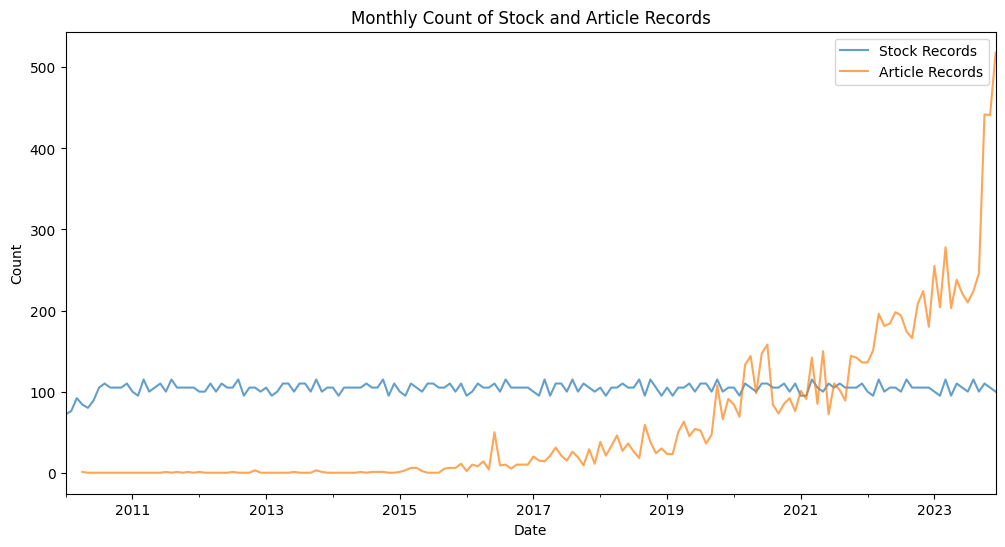

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_stock and df_article are your dataframes for stocks and articles, respectively
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_text['date'] = pd.to_datetime(df_text['date'])

# Resample to monthly frequency and count the number of records
stock_counts = df_stocks.resample('M', on='Date').size()
article_counts = df_text.resample('M', on='date').size()

plt.figure(figsize=(12, 6))
stock_counts.plot(label='Stock Records', alpha=0.7)
article_counts.plot(label='Article Records', alpha=0.7)
plt.title('Monthly Count of Stock and Article Records')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


#### MERGE

In [109]:
# Let's ensure both datasets are aligned in terms of the date format
df_stocks['Date'] = df_stocks['Date'].dt.date
df_text['date'] = df_text['date'].dt.date

# Ensure the date columns in both datasets have the same name
df_stocks.rename(columns={'Date': 'date'}, inplace=True)

# Now you can merge using the 'on' parameter and there won't be duplicate date columns
df = pd.merge(df_text, df_stocks, on='date', how='outer')
df = df.sort_values(by='date', ascending=True)
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'])

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53652 entries, 0 to 53651
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   url                    44373 non-null  object        
 1   softTitle              44373 non-null  object        
 2   title                  44373 non-null  object        
 3   date                   53652 non-null  datetime64[ns]
 4   author                 43476 non-null  object        
 5   description            44265 non-null  object        
 6   keywords               42617 non-null  object        
 7   text                   44373 non-null  object        
 8   Article Length         44373 non-null  float64       
 9   Stock                  52533 non-null  object        
 10  Open                   52533 non-null  float64       
 11  Low                    52533 non-null  float64       
 12  Close                  52533 non-null  float64       
 13  A

#### date range selection

In [111]:
# Assuming 'df' is your merged DataFrame and you have already formatted the 'date' column as a date
df['date'] = pd.to_datetime(df['date'])

# Define your start date
start_date = pd.to_datetime('2015-01-01')

# Filter the DataFrame
df = df[df['date'] >= start_date]

In [112]:
df.head(1)

,url,softTitle,title,date,author,description,keywords,text,Article Length,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
6178,NaN,NaN,NaN,2015-01-02,NaN,NaN,NaN,NaN,NaN,TSLA,14.883333,14.217333,14.620667,14.620667,71466000.0,1.0,-1.393818,-0.013938


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47474 entries, 6178 to 53651
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   url                    44284 non-null  object        
 1   softTitle              44284 non-null  object        
 2   title                  44284 non-null  object        
 3   date                   47474 non-null  datetime64[ns]
 4   author                 43407 non-null  object        
 5   description            44176 non-null  object        
 6   keywords               42528 non-null  object        
 7   text                   44284 non-null  object        
 8   Article Length         44284 non-null  float64       
 9   Stock                  46355 non-null  object        
 10  Open                   46355 non-null  float64       
 11  Low                    46355 non-null  float64       
 12  Close                  46355 non-null  float64       
 13  Adj

### EDA

#### looking at distribution to decide between mean/medium 

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

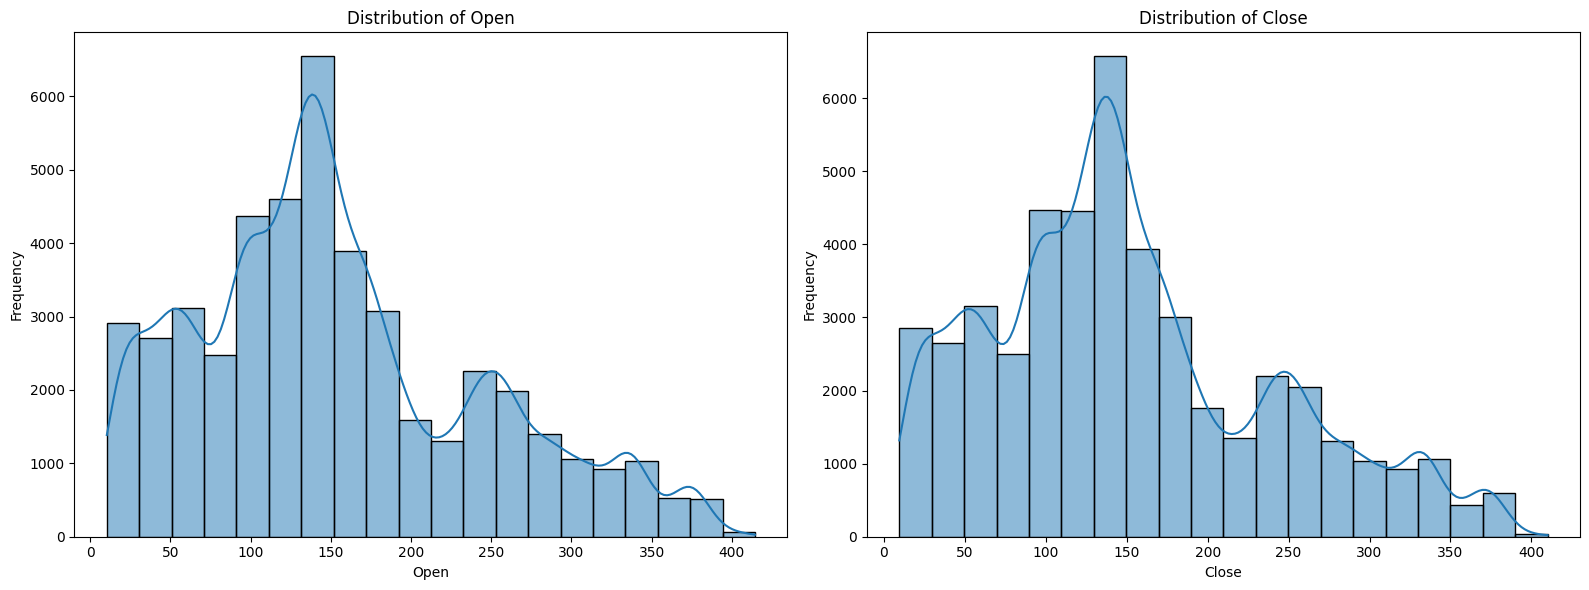

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_num contains multiple columns you want to plot
columns_to_plot = ['Open', 'Close']  # Replace these with your actual column names

num_columns = len(columns_to_plot)
fig, axes = plt.subplots(1, num_columns, figsize=(16, 6))  # Adjust the figsize as needed

for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [115]:
df.head(2)

,url,softTitle,title,date,author,description,keywords,text,Article Length,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
6178,NaN,NaN,NaN,2015-01-02,NaN,NaN,NaN,NaN,NaN,TSLA,14.883333,14.217333,14.620667,14.620667,71466000.0,1.0,-1.393818,-0.013938
6179,NaN,NaN,NaN,2015-01-02,NaN,NaN,NaN,NaN,NaN,GOOG,26.490770,26.133251,26.168653,26.168653,28951268.0,1.0,-0.302053,-0.003021


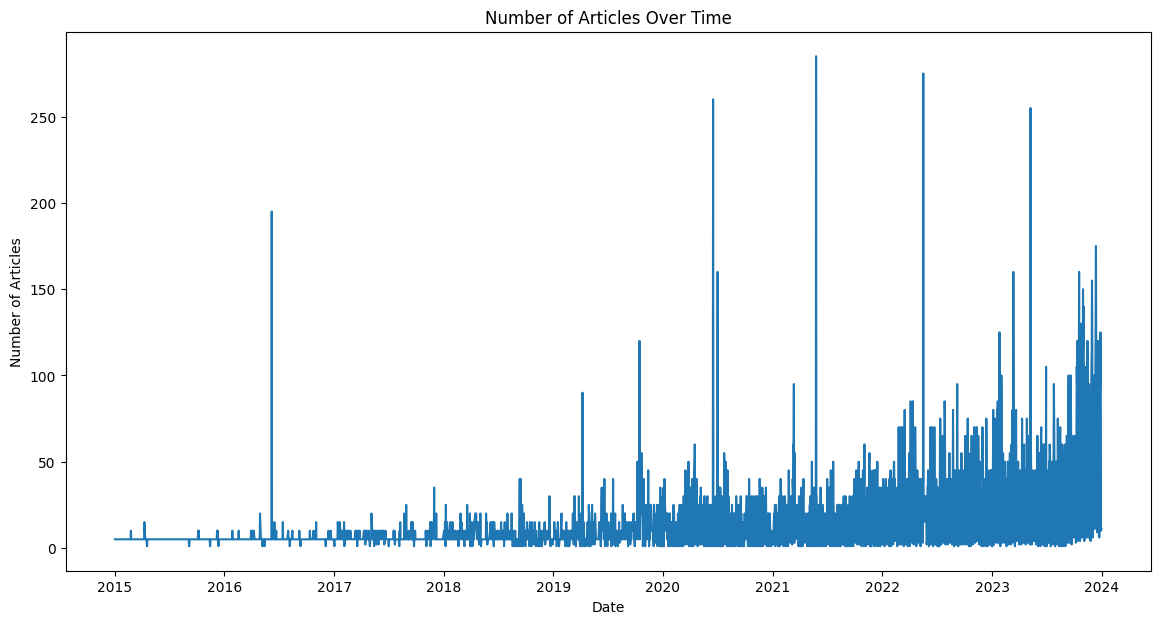

In [116]:
import pandas as pd

df['date'] = pd.to_datetime(df['date'])

# Now that 'date' is in datetime format, group by date (without time component) and count the articles
articles_over_time_filtered = df.groupby(df['date'].dt.date).size()

# If you're plotting, ensure to include the plotting library and use the correct plotting commands
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
articles_over_time_filtered.plot(kind='line')  # Assuming you want a line plot
plt.title('Number of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


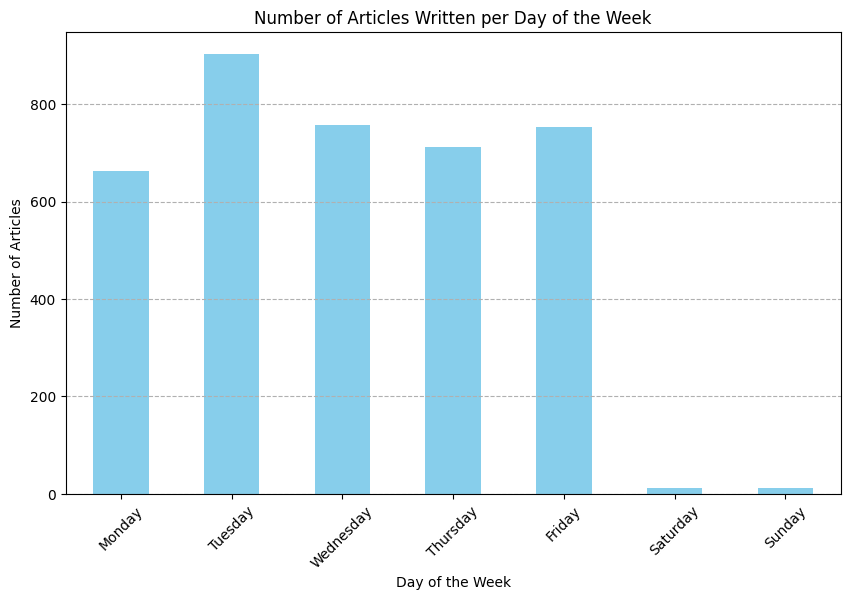

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_text_simplified is your articles DataFrame and 'date' is the column with article dates
# Convert 'date' to datetime if it's not already
df_text['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (Monday=0, Sunday=6)
df_text['day_of_week'] = df_text['date'].dt.dayofweek

# Map the day of the week to actual day names for clarity in the plot
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_text['day_name'] = df_text['day_of_week'].map(day_map)

# Aggregate articles by day of the week
articles_per_day = df_text.groupby('day_name').size().reindex(day_map.values())

# Plotting
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Written per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


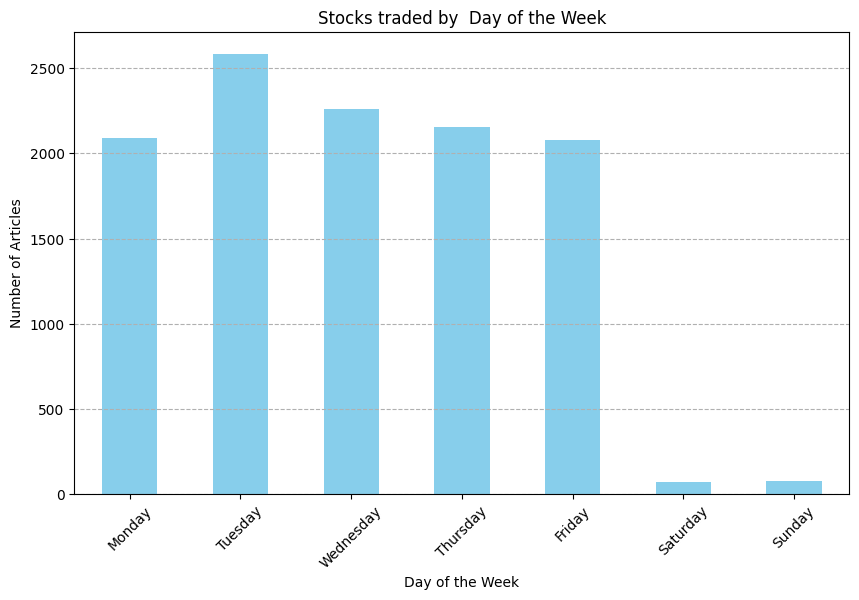

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_text_simplified is your articles DataFrame and 'date' is the column with article dates
# Convert 'date' to datetime if it's not already
df_stocks['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (Monday=0, Sunday=6)
df_stocks['day_of_week'] = df_stocks['date'].dt.dayofweek

# Map the day of the week to actual day names for clarity in the plot
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_stocks['day_name'] = df_stocks['day_of_week'].map(day_map)

# Aggregate articles by day of the week
articles_per_day = df_stocks.groupby('day_name').size().reindex(day_map.values())

plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='skyblue')
plt.title('Stocks traded by  Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


Weekend activity 

In [119]:
# Alternatively, if you used 'day_name':
weekend_articles_text = df_text[(df_text['day_name'] == 'Saturday') | (df_text['day_name'] == 'Sunday')]

len(weekend_articles_text)


24

In [120]:
# Alternatively, if you used 'day_name':
weekend_articles = df_stocks[(df_stocks['day_name'] == 'Saturday') | (df_stocks['day_name'] == 'Sunday')]

# Display the filtered rows
len(weekend_articles)


142

#### Null Values

In [121]:
## replace null values with Median
import numpy as np

df['Open'] = df['Open'].fillna(df['Open'].median())
df['Close'] = df['Close'].fillna(df['Close'].median())

In [122]:
def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage

    Parameters:
    df (DataFrame): Dataframe to check

    Returns:
    
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]/len(df)
    null_values.columns = ['null_count','null_pct']
    return null_values

nulls_summary_table(df)

,null_count,null_pct
url,3190,0.067195
softTitle,3190,0.067195
title,3190,0.067195
date,0,0.000000
author,4067,0.085668
description,3298,0.069470
keywords,4946,0.104183
text,3190,0.067195
Article Length,3190,0.067195
Stock,1119,0.023571


In [123]:
# Filter the DataFrame to only include rows where any column has a null value
df_with_nulls = df[df.isnull().any(axis=1)]

C:\Users\ethan\AppData\Local\Temp\ipykernel_19088\371439882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_nulls['day_of_week'] = df_with_nulls['date'].dt.dayofweek
C:\Users\ethan\AppData\Local\Temp\ipykernel_19088\371439882.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_nulls['day_name'] = df_with_nulls['day_of_week'].map(day_names)


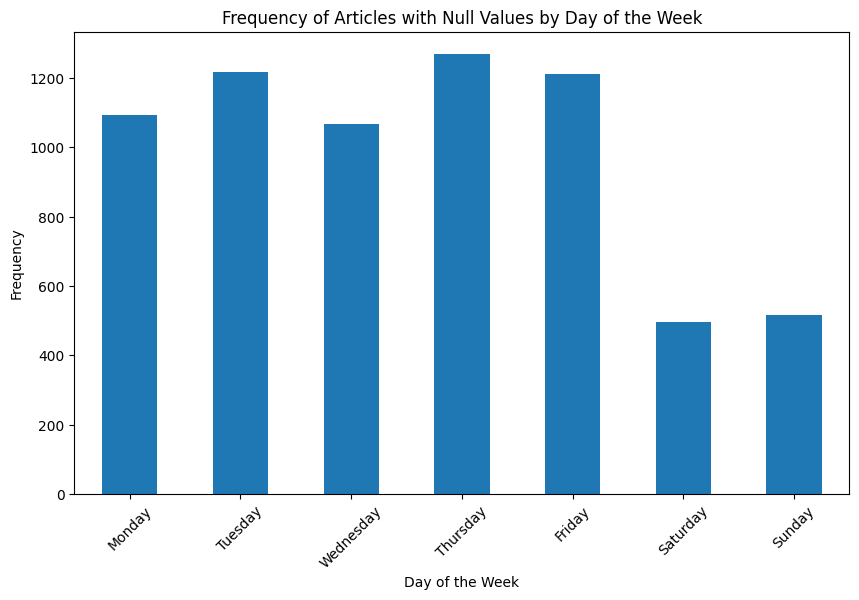

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_with_nulls' is your DataFrame and it already has a 'date' column in datetime format

# Calculate day of the week for each date (Monday=0, Sunday=6)
df_with_nulls['day_of_week'] = df_with_nulls['date'].dt.dayofweek

# Map day of the week to day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_with_nulls['day_name'] = df_with_nulls['day_of_week'].map(day_names)

# Count occurrences for each day of the week
day_counts = df_with_nulls['day_name'].value_counts().reindex(day_names.values())

# Plotting
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.title('Frequency of Articles with Null Values by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate day names for better readability
plt.show()


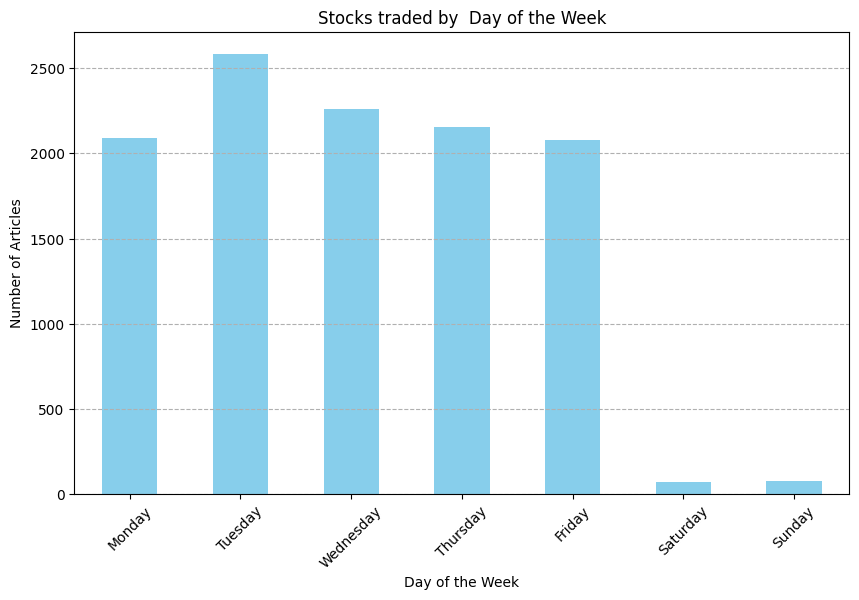

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_text_simplified is your articles DataFrame and 'date' is the column with article dates
# Convert 'date' to datetime if it's not already
df_stocks['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (Monday=0, Sunday=6)
df_stocks['day_of_week'] = df_stocks['date'].dt.dayofweek

# Map the day of the week to actual day names for clarity in the plot
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_stocks['day_name'] = df_stocks['day_of_week'].map(day_map)

# Aggregate articles by day of the week
articles_per_day = df_stocks.groupby('day_name').size().reindex(day_map.values())

# Plotting
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='skyblue')
plt.title('Stocks traded by  Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


C:\Users\ethan\AppData\Local\Temp\ipykernel_19088\1854889488.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_days['date'] = pd.to_datetime(stock_days['date'])
C:\Users\ethan\AppData\Local\Temp\ipykernel_19088\1854889488.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_days['date'] = pd.to_datetime(article_days['date'])


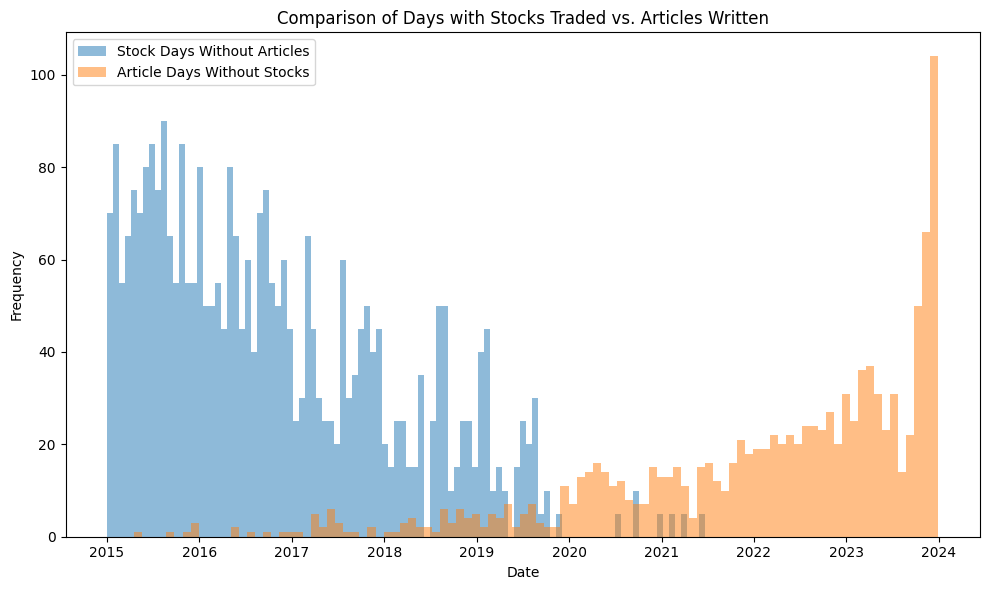

In [126]:
import matplotlib.pyplot as plt
import pandas as pd

stock_days = df[df['Stock'].notna() & df['url'].isna()]

# Filter for days with article data but no stock data (assuming there's a way to identify these)
article_days = df[df['Stock'].isna() & df['url'].notna()]

# Convert date columns to datetime
stock_days['date'] = pd.to_datetime(stock_days['date'])
article_days['date'] = pd.to_datetime(article_days['date'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot histogram for stock days
plt.hist(stock_days['date'], bins=100, alpha=0.5, label='Stock Days Without Articles')

# Plot histogram for article days (Modify this based on actual data scenario)
plt.hist(article_days['date'], bins=100, alpha=0.5, label='Article Days Without Stocks')

plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Comparison of Days with Stocks Traded vs. Articles Written')
plt.legend()
plt.tight_layout()
plt.show()


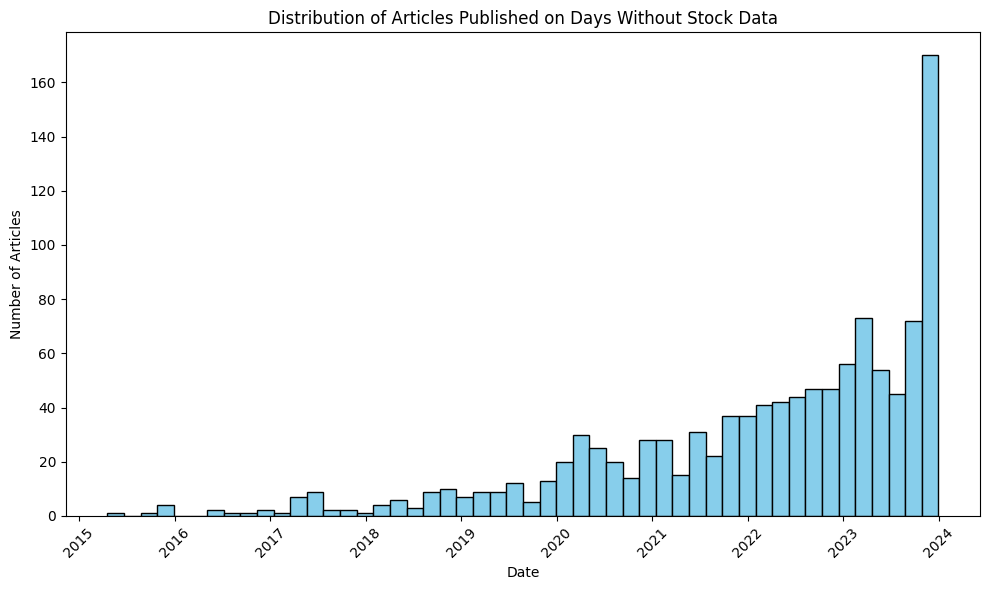

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the merged data
filtered_dataset = df[df['Stock'].isnull()]
dates_with_null_stock = filtered_dataset['date']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(dates_with_null_stock, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Articles Published on Days Without Stock Data')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### remove null values

i removed null values, since there are a very small % of null values in the dataset

In [128]:
df = df.dropna()
df.reset_index(inplace=True, drop=True)

In [129]:
df.isnull().sum()

url                      0
softTitle                0
title                    0
date                     0
author                   0
description              0
keywords                 0
text                     0
Article Length           0
Stock                    0
Open                     0
Low                      0
Close                    0
Adjusted_Close           0
Volume                   0
Month                    0
Price_Change_Pct         0
Adjusted_Close_Change    0
dtype: int64

In [130]:
df.head()

,url,softTitle,title,date,author,description,keywords,text,Article Length,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
0,https://www.cnbc.com/2015/02/24/nials-rent-but...,Renting your place? Skipping this could cost you,Renting your place? Skipping this could cost you,2015-02-24,Landon Dowdy,Millennials are more likely to rent than to ow...,"Personal finance,business news",Personal FinanceRenting your place? Skipping t...,741.0,MSFT,44.299999,43.919998,44.090000,38.414326,25271700.0,2.0,-0.135903,-0.001359
1,https://www.cnbc.com/2015/02/24/apples-record-...,Apple’s record rally depends on Obama?,Apple’s record rally depends on Obama?,2015-02-24,John Melloy,The size of Apple's capital return program wil...,"Stock markets,business news",In order for Apple to extend its 21 percent ra...,499.0,AMZN,19.024000,18.808001,18.929501,18.929501,38416000.0,2.0,-0.407741,-0.004077
2,https://www.cnbc.com/2015/02/24/apples-record-...,Apple’s record rally depends on Obama?,Apple’s record rally depends on Obama?,2015-02-24,John Melloy,The size of Apple's capital return program wil...,"Stock markets,business news",In order for Apple to extend its 21 percent ra...,499.0,AAPL,33.400002,32.792500,33.042500,29.694435,276912400.0,2.0,-0.624062,-0.006241
3,https://www.cnbc.com/2015/02/24/apples-record-...,Apple’s record rally depends on Obama?,Apple’s record rally depends on Obama?,2015-02-24,John Melloy,The size of Apple's capital return program wil...,"Stock markets,business news",In order for Apple to extend its 21 percent ra...,499.0,TSLA,13.819333,13.446667,13.607333,13.607333,99054000.0,2.0,-1.557832,-0.015578
4,https://www.cnbc.com/2015/02/24/apples-record-...,Apple’s record rally depends on Obama?,Apple’s record rally depends on Obama?,2015-02-24,John Melloy,The size of Apple's capital return program wil...,"Stock markets,business news",In order for Apple to extend its 21 percent ra...,499.0,GOOG,26.766014,26.340183,26.731110,26.731110,20101036.0,2.0,0.785846,0.007858



Notes after meeting professor:

look at onyl tsla

and look at somehting lie smp500 but iwth 10 stocks

calculate sentiment score per day 

panel data anlaysis (chapter 16)

In [131]:
df.to_csv('../merged_df/merged_df.csv')

delete all the days where an aritlces wan't published 

also figure out how to ttake care of thet null values